# Regresión Lineal Múltiple: Perfil Aerodinámico y Presión Sonora

Este proyecto analiza la relación entre diversas variables aerodinámicas y el nivel de presión sonora en un perfil aerodinámico, utilizando un modelo de **regresión lineal múltiple**. 

Los datos provienen de un estudio de la **NASA** publicado en el UCI Machine Learning Repository.

---

### 1. Importación de datos y análisis inicial

Los datos se cargaron desde el archivo `A1.3 NASA.csv`. Se revisan las dimensiones del dataset y se imprimen las primeras 15 filas.


In [125]:

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

data = pd.read_csv("A1.3 NASA.csv")
print(f"Dimensiones de los datos: {data.shape}")
display(data.head(15))


Dimensiones de los datos: (1503, 6)


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541



---

### 2. División de datos en entrenamiento y prueba

Se separan los datos en entrenamiento (70%) y prueba (30%) de forma aleatoria.


In [126]:
# Separar en datos de entrenamiento y prueba
train, test = train_test_split(data, test_size=0.3, random_state=42)

print(f"Dimensiones del entrenamiento: {train.shape}")
print(f"Dimensiones de prueba: {test.shape}")


Dimensiones del entrenamiento: (1052, 6)
Dimensiones de prueba: (451, 6)



---

### 3. Entrenamiento del modelo de Regresión Lineal Múltiple

Se entrena el modelo para predecir `presion` usando las variables restantes como predictores. **Nota:** Se agrega una constante al modelo para incluir el término independiente (intercepto), lo cual asegura que el modelo pueda ajustarse correctamente y no asuma que pasa por el origen.


In [127]:
# Variables
X_train = train.drop(columns=["presion"])
y_train = train["presion"]
X_train = sm.add_constant(X_train) 

# Ajustar modelo
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.38e-164
Time:                        14:04:58   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0


---

### 4. Evaluación de la significancia de las variables

Se identifican las variables con coeficientes significativos y se analiza cuál es la más importante. **Nota:** Se omite la variable "const" ya que solo lo usamos como intercepto y por esa razon tendra un p-value de 0.


In [128]:
# Extraer p-values
p_values = model.pvalues

# Variables significativas (p < 0.05)
significativas = p_values[p_values < 0.05]
print("Variables con asociación significativa:")
print(significativas)

variables_predictoras = significativas.drop("const", errors="ignore")

var_mas_importante = variables_predictoras.idxmin()
print(f"Variable más importante: {var_mas_importante}")


Variables con asociación significativa:
const          0.000000e+00
frecuencia    1.667773e-118
angulo         2.097471e-14
longitud       4.981210e-63
velocidad      4.963051e-24
espesor        2.818412e-17
dtype: float64
Variable más importante: frecuencia



---

### 5. Cálculo de RSE y R² en entrenamiento y prueba

Se evalúan las métricas del modelo en ambos conjuntos de datos.


In [129]:
# RSE y R² en entrenamiento
RSE_train = np.sqrt(model.scale)
R2_train = model.rsquared
print(f"RSE (entrenamiento): {RSE_train:.4f}")
print(f"R² (entrenamiento): {R2_train:.4f}")

# Datos de prueba
X_test = test.drop(columns=["presion"])
y_test = test["presion"]
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# RSE en prueba
RSS_test = sum((y_test - y_pred) ** 2)
RSE_test = np.sqrt(RSS_test / (len(y_test) - 2))

# R² en prueba
TSS_test = sum((y_test - np.mean(y_test)) ** 2)
R2_test = 1 - (RSS_test / TSS_test)

print(f"RSE (prueba): {RSE_test:.4f}")
print(f"R² (prueba): {R2_test:.4f}")


RSE (entrenamiento): 4.7914
R² (entrenamiento): 0.5214
RSE (prueba): 4.8778
R² (prueba): 0.4983



---

### 6. Visualización del modelo

Se grafica la relación entre los valores reales y los valores predichos para evaluar visualmente el desempeño del modelo.


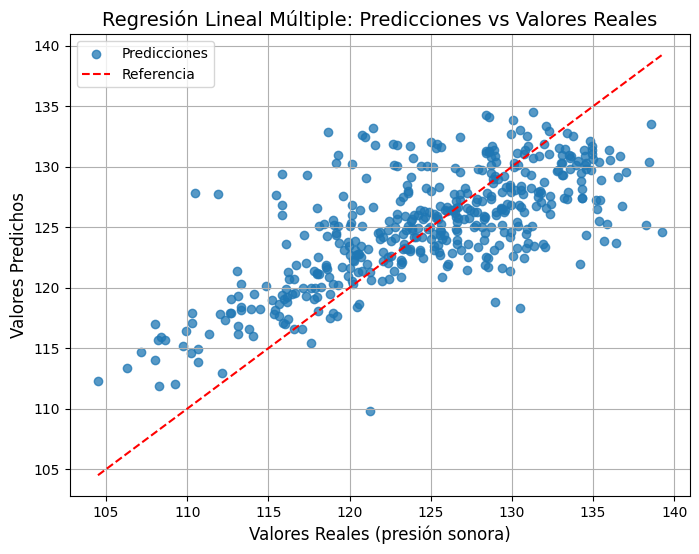

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.75, label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Referencia")
plt.title("Regresión Lineal Múltiple: Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (presión sonora)", fontsize=12)
plt.ylabel("Valores Predichos", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



---

### Conclusión

Se identificó que algunas variables tienen una asociación significativa con la presión sonora. El modelo tiene un desempeño aceptable según su R² y RSE, aunque no es perfecto. La visualización muestra que hay cierta dispersión, indicando que otros factores pueden influir en la presión sonora. 

### Referencias

- [UCI Machine Learning Repository: Airfoil Self-Noise Dataset](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise)
- [NASA Reference Publication 1218](https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf)


